In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
import os

data_path = "../data/processed/"
files = os.listdir(data_path)

appliances = sorted({
    f.replace("X_train_", "").replace(".csv", "")
    for f in files
    if f.startswith("X_train_")
})

print(f"Detected appliances: {appliances}")

Detected appliances: ['Air Conditioning', 'Computer', 'Dishwasher', 'Fridge', 'Heater', 'Lights', 'Microwave', 'Oven', 'TV', 'Washing Machine']



Training Linear Regression for: Air Conditioning
MAE  : 2.8536
RMSE : 3.5977


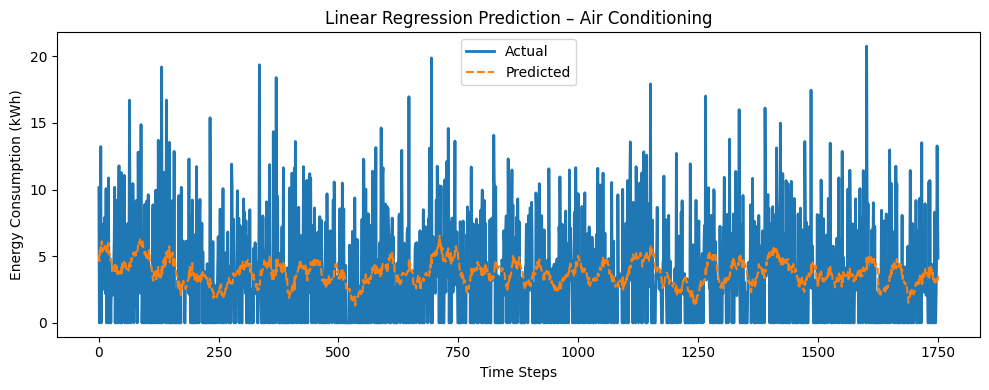


Training Linear Regression for: Computer
MAE  : 0.9917
RMSE : 1.2378


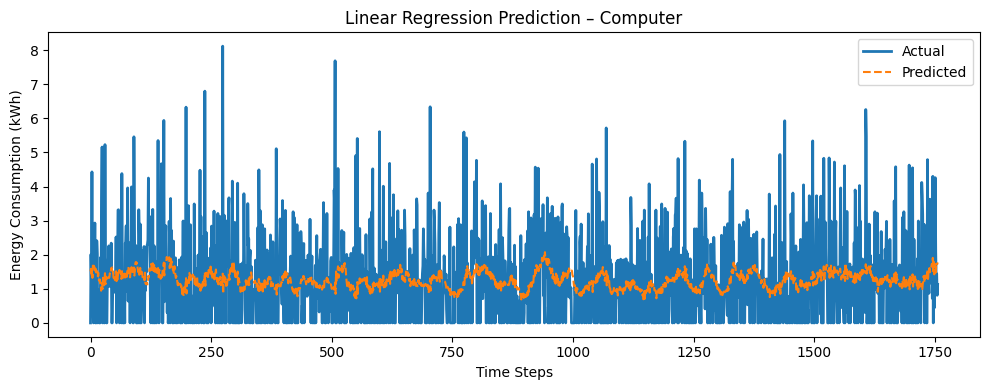


Training Linear Regression for: Dishwasher
MAE  : 1.0400
RMSE : 1.2991


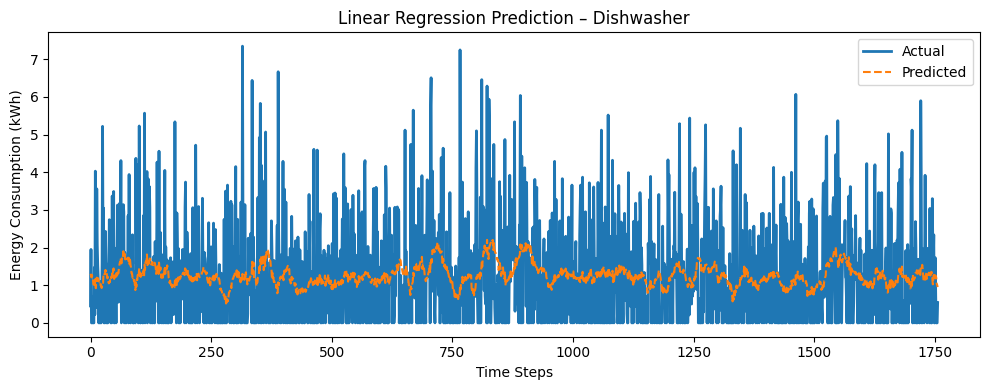


Training Linear Regression for: Fridge
MAE  : 0.2736
RMSE : 0.3390


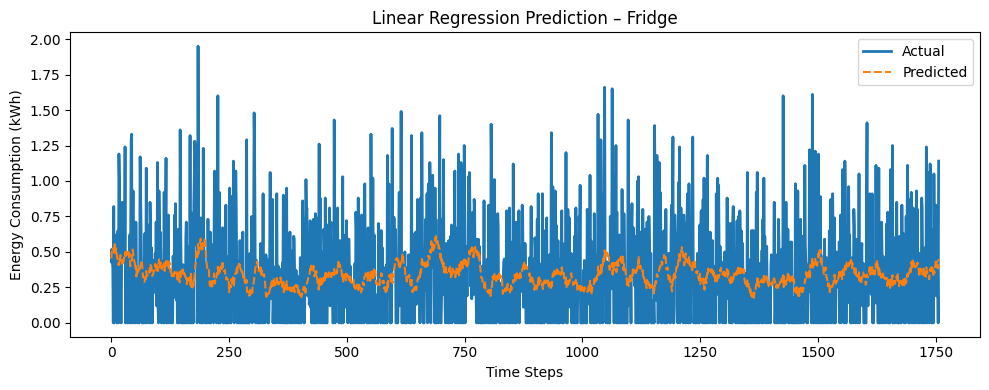


Training Linear Regression for: Heater
MAE  : 2.7455
RMSE : 3.4523


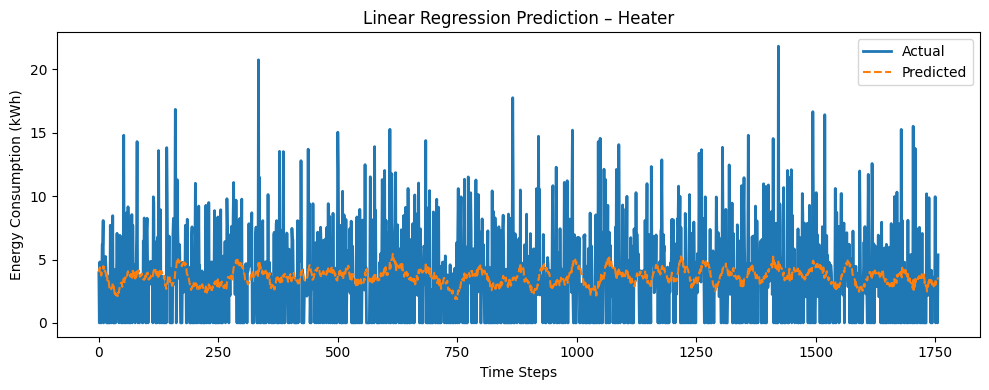


Training Linear Regression for: Lights
MAE  : 0.9817
RMSE : 1.2081


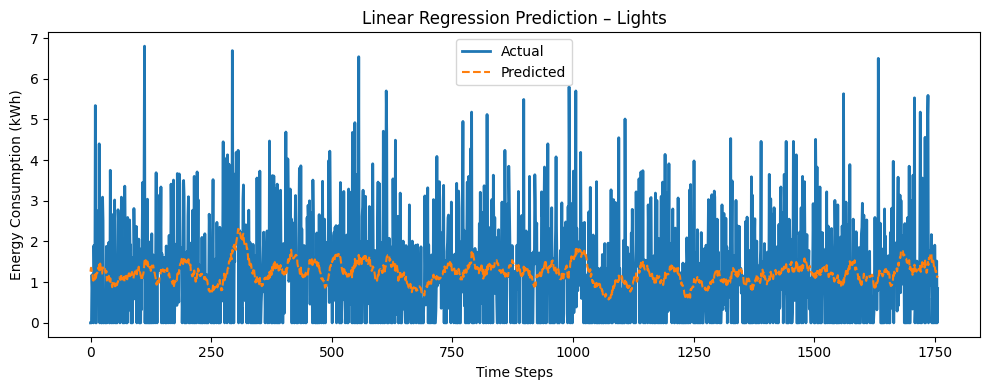


Training Linear Regression for: Microwave
MAE  : 1.0149
RMSE : 1.2794


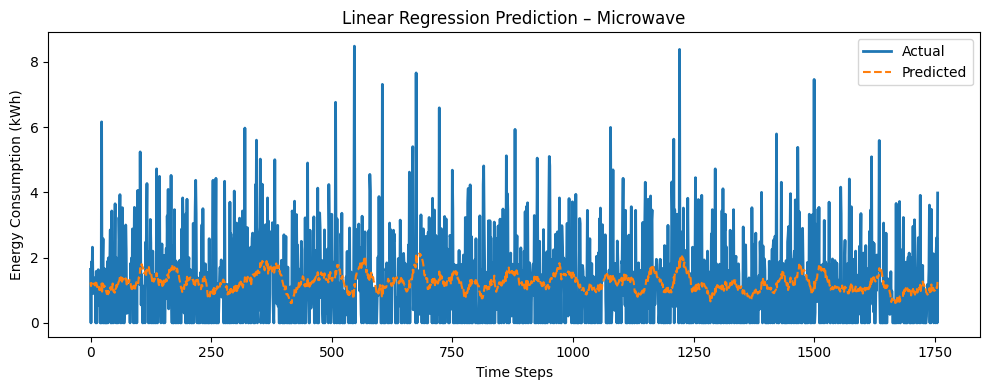


Training Linear Regression for: Oven
MAE  : 1.0286
RMSE : 1.2868


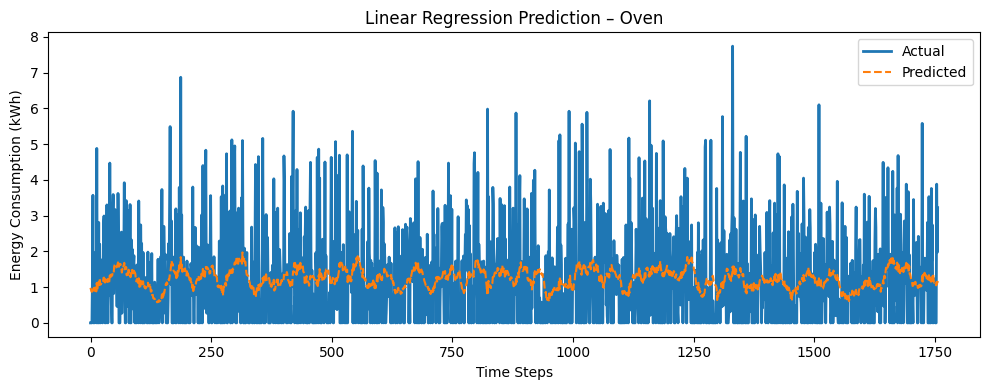


Training Linear Regression for: TV
MAE  : 0.9987
RMSE : 1.2408


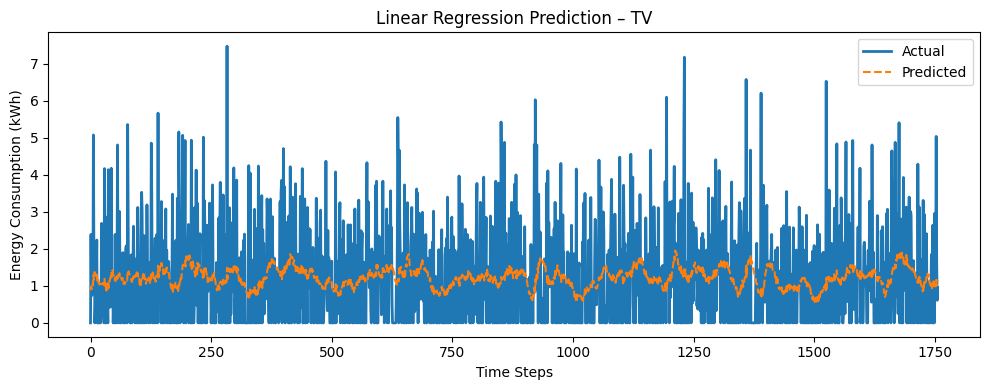


Training Linear Regression for: Washing Machine
MAE  : 0.9814
RMSE : 1.2227


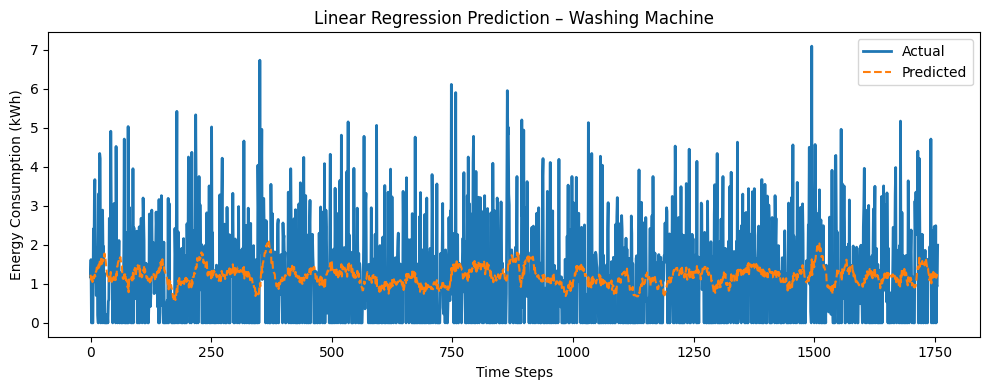

,Appliance,MAE,RMSE
0,Air Conditioning,2.853608,3.597696
1,Computer,0.991654,1.237802
2,Dishwasher,1.040021,1.299050
3,Fridge,0.273552,0.338951
4,Heater,2.745520,3.452303
5,Lights,0.981745,1.208070
6,Microwave,1.014921,1.279435
7,Oven,1.028588,1.286755
8,TV,0.998717,1.240846
9,Washing Machine,0.981406,1.222666


In [4]:
results = []

for appliance in appliances:
    
    print(f"\nTraining Linear Regression for: {appliance}")
    
    X_train = pd.read_csv(f"{data_path}X_train_{appliance}.csv")
    X_test  = pd.read_csv(f"{data_path}X_test_{appliance}.csv")
    y_train = pd.read_csv(f"{data_path}y_train_{appliance}.csv").values.ravel()
    y_test  = pd.read_csv(f"{data_path}y_test_{appliance}.csv").values.ravel()
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        "Appliance": appliance,
        "MAE": mae,
        "RMSE": rmse
    })
    
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    
    plt.figure(figsize=(10,4))
    plt.plot(y_test, label="Actual", linewidth=2)
    plt.plot(y_pred, label="Predicted", linestyle="--")
    plt.title(f"Linear Regression Prediction – {appliance}")
    plt.xlabel("Time Steps")
    plt.ylabel("Energy Consumption (kWh)")
    plt.legend()
    plt.tight_layout()
    plt.show()
    joblib.dump(
        model,
        f"../models/linear_regression_{appliance}.pkl"
    )


results_df = pd.DataFrame(results)
results_df